In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [35]:
df = pd.read_csv('final_data.csv')

In [36]:
df.head()

,Unnamed: 0,title,description,price,date_posted,address,url
0,0,20'/40' - STORAGE CONTAINERS FOR SALE & RENT!!,Get only the ***best units*** at the lowest ...,"$3,200.00",17/03/2023,Calgary,https://www.kijiji.ca/v-storage-parking/calgar...
1,1,Renovated 1 Bedroom For Rent - Forest Hill,Bachelor and 1 bedroom apartments Ready to R...,"$2,049.00",17/03/2023,City of Toronto,https://www.kijiji.ca/v-apartments-condos/city...
2,2,The Onyx - 2 Bedroom Apartment for Rent,Ironclad Properties presents The Onyx! Embra...,"$1,748.00",30/03/2023,Winnipeg,https://www.kijiji.ca/v-apartments-condos/winn...
3,3,Campling Ave - 3 Bedroom Upper Suite House for...,Welcome to 5659A Campling Avenue! These ...,"$1,530.00",06/04/2023,Regina,https://www.kijiji.ca/v-apartments-condos/regi...
4,4,MUST SEE! 1 BED APARTMENT FOR RENT NEAR BRITAN...,LIMITED TIME OFFER: $500 MOVE-IN INCENTIVE ...,"$1,825.00",29/03/2023,Ottawa,https://www.kijiji.ca/v-apartments-condos/otta...


In [37]:
df.shape

(3489, 7)

In [38]:
df.drop_duplicates(subset='url', inplace=True)
df.shape

(2931, 7)

In [39]:
print(df['price'].value_counts())

Please Contact    295
Free               54
$800.00            40
$750.00            39
$700.00            35
                 ... 
$2,083.00           1
$2,618.00           1
$2,114.00           1
$2,231.00           1
$1,175              1
Name: price, Length: 925, dtype: int64


In [40]:
price_regex = r'^\$?([\d,]+)(?:\.(\d{2}))?$'

# Define function to extract numeric value from price string
def extract_numeric_value(price_str):
    match = re.match(price_regex, price_str)
    if match:
        return float(match.group(1).replace(',', '') + '.' + (match.group(2) if match.group(2) else '00'))
    else:
        return None

In [41]:
df['price'] = df['price'].astype(str)

In [42]:
df['price'] = df['price'].apply(extract_numeric_value)

In [43]:
print(df['price'].value_counts())

750.0     51
800.0     48
650.0     47
2500.0    45
900.0     45
          ..
1380.0     1
970.0      1
819.0      1
560.0      1
1175.0     1
Name: price, Length: 783, dtype: int64


In [44]:
df.isnull().sum()

Unnamed: 0       0
title            5
description      5
price          366
date_posted     61
address          0
url              0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

Unnamed: 0     0
title          0
description    0
price          0
date_posted    0
address        0
url            0
dtype: int64

In [47]:
df.shape

(2515, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x164027df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1640353d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x164027af0>],
 'medians': [<matplotlib.lines.Line2D at 0x164035970>],
 'fliers': [<matplotlib.lines.Line2D at 0x164035c40>],
 'means': []}

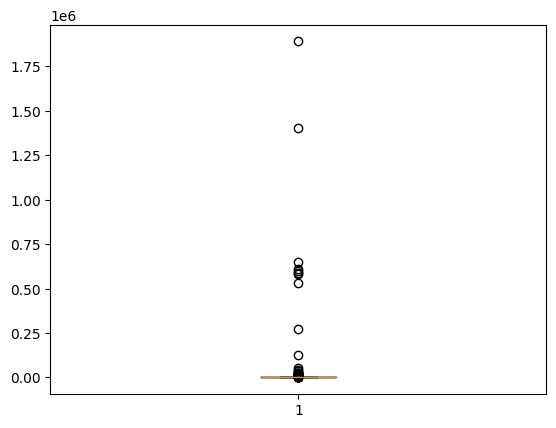

In [48]:
plt.boxplot(df['price'])

In [49]:
df.describe()

,Unnamed: 0,price
count,2515.000000,2.515000e+03
mean,1135.450099,4.651335e+03
std,778.574482,5.536237e+04
min,0.000000,1.000000e+00
25%,382.000000,8.610000e+02
50%,1073.000000,1.500000e+03
75%,1814.000000,2.241000e+03
max,2585.000000,1.888888e+06


In [50]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers from the DataFrame
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x16407d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16407df70>,
 'boxes': [<matplotlib.lines.Line2D at 0x16407d700>],
 'medians': [<matplotlib.lines.Line2D at 0x164089550>],
 'fliers': [<matplotlib.lines.Line2D at 0x164089820>],
 'means': []}

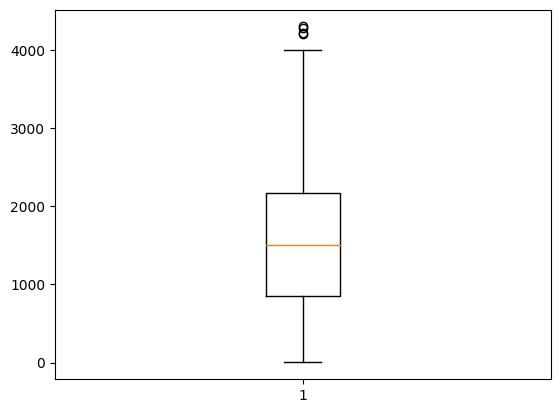

In [51]:
plt.boxplot(df['price'])

In [52]:
df.shape

(2446, 7)

In [53]:
re.search('\d+', '< 3 minutes ago')

<re.Match object; span=(2, 3), match='3'>

In [54]:
def parse_date_string(date_str):
    if "minutes ago" in date_str or "hours" in date_str:
        ptrn = re.search('\d+', date_str)
        minutes_ago = int(ptrn.group(0))
        return datetime.datetime.now() - datetime.timedelta(minutes=minutes_ago)
    elif "yesterday" in date_str.lower():
        return datetime.datetime.now() - datetime.timedelta(days=1)
    elif "today" in date_str.lower():
        return datetime.datetime.now()
    else:
        return pd.to_datetime(date_str)

df['date_posted'] = df['date_posted'].apply(parse_date_string)
df['month'] = df['date_posted'].dt.month


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_60661/1210474638.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(date_str)


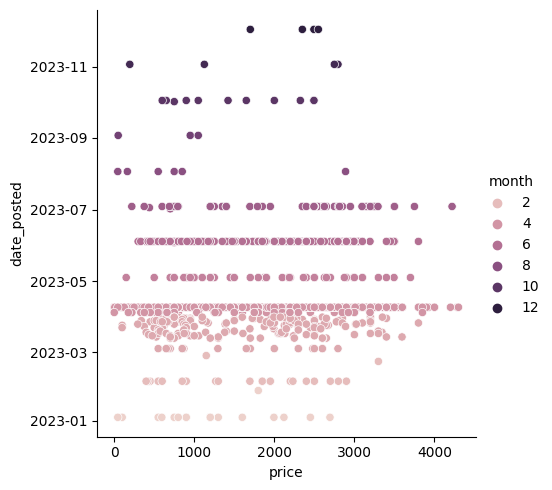

In [58]:
sns.relplot(y='date_posted', x='price', hue='month', kind='scatter', data=df)

In [57]:
# Extract city name from address column
def extract_city(address):
    cities = ['brampton', 'mississauga', 'don mills', 'toronto', 'ajax', 'markham', 'scarborough', 'north york']
    for city in cities:
        if city in address.lower():
            return city
    return 'Other'

df['city'] = df['address'].apply(extract_city)

grouped = df.groupby('city')
for name, group in grouped:
    print(f"{name}: {len(group)}")

Other: 38
brampton: 6
don mills: 17
markham: 18
mississauga: 4
north york: 141
scarborough: 84
toronto: 156


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_52758/105519628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['address'].apply(extract_city)


[Text(0, 0, 'toronto'),
 Text(1, 0, 'scarborough'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'markham'),
 Text(4, 0, 'north york'),
 Text(5, 0, 'don mills'),
 Text(6, 0, 'brampton'),
 Text(7, 0, 'mississauga')]

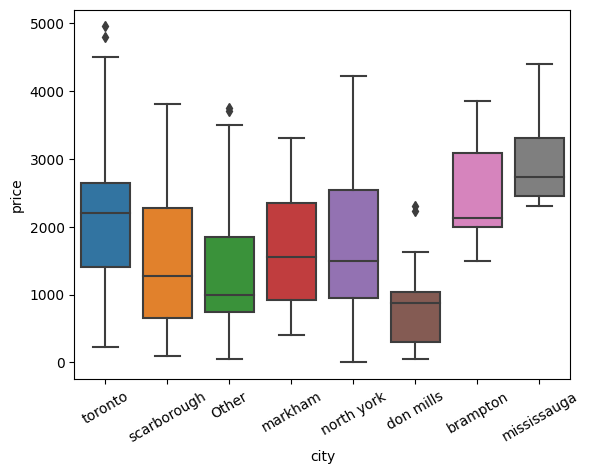

In [58]:
ax = sns.boxplot(x='city', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

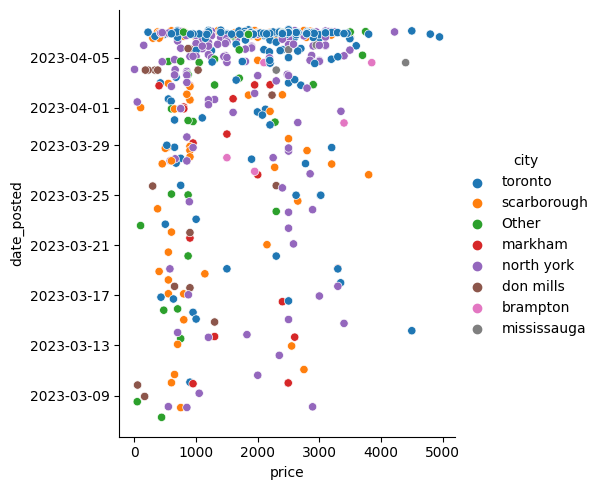

In [62]:
sns.relplot(y='date_posted', x='price', hue='city', kind='scatter', data=df)

<AxesSubplot:>

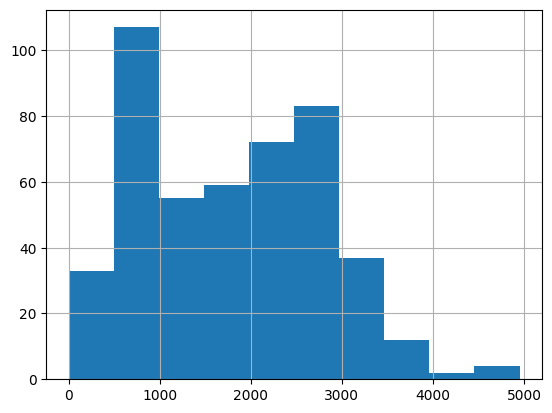

In [27]:
df['price'].hist()

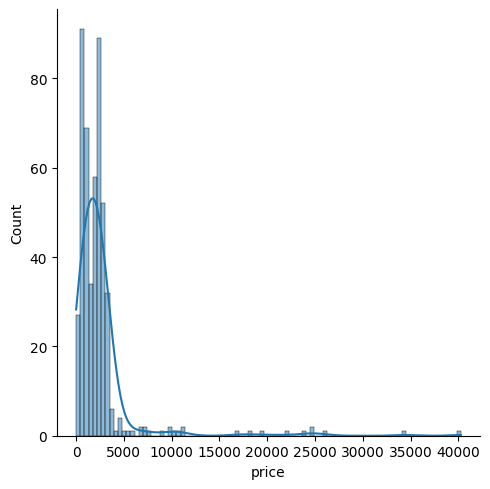

In [47]:
sns.displot(data=df, x='price', kde=True)

In [37]:
# pattern detecting male and female
pattern = re.compile(r'\b(male|female|m|f|man|woman)\b', flags=re.IGNORECASE)

# Apply the pattern
df['gender'] = df['description'].str.extract(pattern, expand=False)

gender_map = {
    'male': 'male',
    'Male': 'male',
    'MALE': 'male',
    'm': 'male',
    'man': 'male',
    'female': 'female',
    'Female': 'female',
    'FEMALE': 'female',
    'f': 'female',
    'woman': 'female'
}
# Group using gender
df['gender'] = df['gender'].map(gender_map)
counts = df['gender'].value_counts()

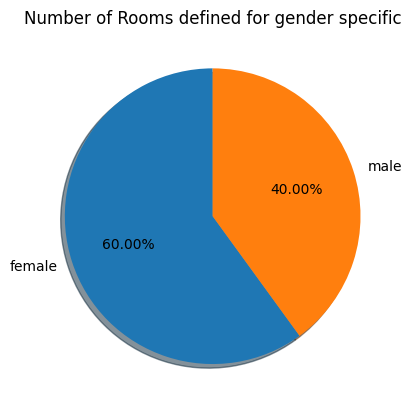

In [40]:
plt.pie(counts.values, labels=counts.index, autopct="%0.2f%%", startangle=90, shadow=True)
plt.title('Number of Rooms defined for gender specific')
plt.show()